<a href="https://colab.research.google.com/github/chokpik/cd_202202_Camilo_Duran/blob/master/Taller7_K_de_Ripley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 5
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import pyproj
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

In [6]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [7]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [8]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [9]:
from decimal import DivisionByZero
from math import sqrt
def NearPoint(x_list, y_list, proximity):
  near_points = []
  if len(x_list) != len(y_list):
    raise ValueError(f'X list and Y list value does not match')
  for i in range(len(x_list)):
    near_points.append([])
    x0 = x_list[i]
    y0 = y_list[i]
    for j in range(len(x_list)):
      if i != j:
        x1 = x_list[j]
        y1 = y_list[j]
        x = abs(x1 - x0)
        y = abs(y1 - y0)
        distance = sqrt(x**2 + y**2)
        if distance <= proximity:
          near_points[i].append((j, distance))
  return near_points

In [10]:
#Funcion K de Ripley
h = 100
near_points = NearPoint(df['x'], df['y'], h)
print(near_points)

[[(395, 69.59606980601369), (863, 42.179492673818636), (1096, 22.879578245261783), (1119, 6.746834603966513)], [(279, 58.589513691342376), (313, 43.38731821705459), (398, 52.577842354381026), (479, 47.936252415619656), (637, 50.54247986220128), (808, 91.33622617188665), (1006, 4.7127115527287)], [(352, 63.690407838938484), (410, 63.01483963808158), (472, 65.86985620612697), (913, 18.629803988494334), (927, 51.927341279751296), (1038, 77.06167536828195), (1052, 13.782995350919657), (1146, 6.249513904802736), (1226, 90.82155700360381)], [(528, 32.034972779503725)], [(297, 63.00196689997656), (821, 92.27810208275517), (917, 70.12719054371819)], [(14, 54.633133027151636), (144, 35.562247292298586), (571, 16.856569180189954)], [(106, 23.656444470134183), (111, 29.233044191538127), (115, 47.892055735010516), (211, 89.08258911698492), (447, 77.27161936942987), (503, 34.5556408191794), (689, 77.24387161622788), (704, 81.09525460427867), (785, 19.455554330391536), (922, 88.56619014812752)], [(2

In [11]:
!pip install pyproj
!pip install geopandas
!sudo apt install libspatialindex-dev
!pip install rtree

!pip install cython
!pip install cartopy

!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely 
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Successfully uninstalled Shapely-1.8.5.post1
Looking in inde

In [12]:

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

In [13]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://foscal.net/cartografia/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.qmd", "68276_urbano.shp","68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

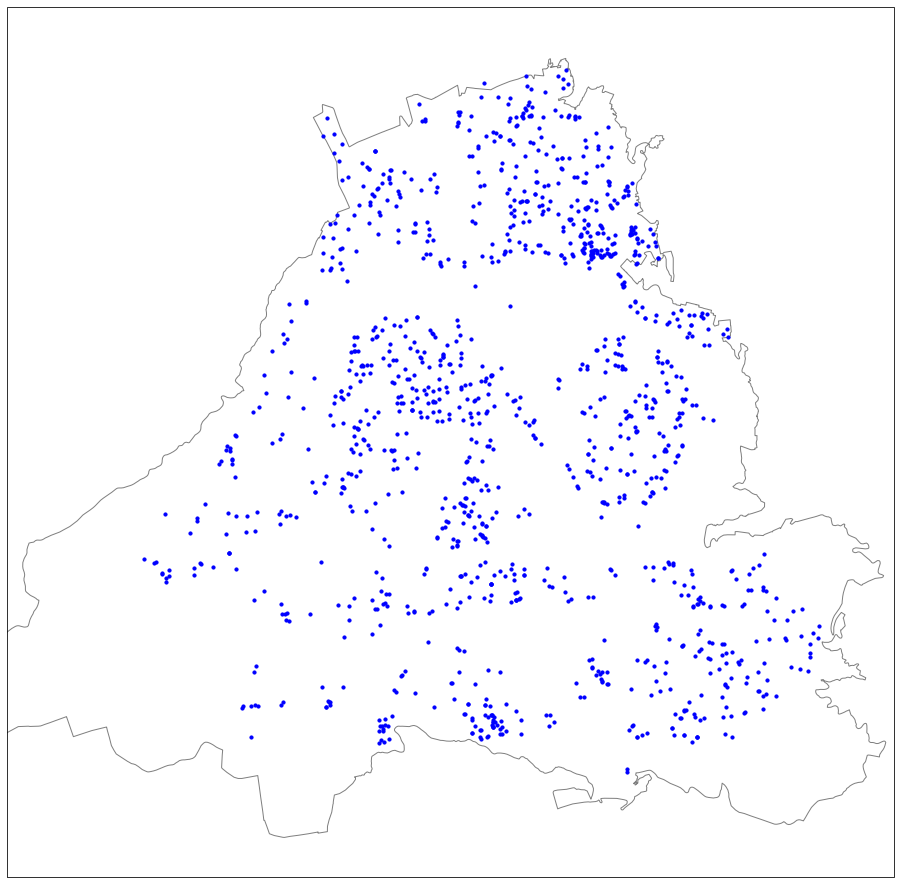

In [14]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

ax.add_line
plt.show()

In [15]:
for geometria in reader.geometries():
    geo = geometria

geod = pyproj.Geod(ellps="WGS84")
area = abs(geod.geometry_area_perimeter(geo)[0])


In [16]:
reader = shapereader.Reader('68276_urbano.shp')
points_to_use = df.shape[0]

for geometry in reader.geometries():
  polygon = geometry

def random_points_in_bound(polygon, number):   
  minx, miny, maxx, maxy = polygon.bounds
  x = np.random.uniform( minx, maxx, number )
  y = np.random.uniform( miny, maxy, number )
  return x, y

In [17]:
import geopandas as gpd

gdf_poly = gpd.GeoDataFrame(index=["florida"], geometry=[polygon])

In [18]:
def distancia(x1,y1,x2,y2):
  distancia = math.sqrt( ((x2-x1)**2) + ((y2-y1)**2) )
  return distancia

In [19]:
def areaMapa(shp):
  florida_map = gpd.read_file(shp)
  florida_map_copy = florida_map.copy()
  crs = pyproj.CRS(proj='utm', zone=18, ellps='WGS84')
  florida_map_copy= florida_map_copy.to_crs(crs)
  florida_map_copy["area_m"] = florida_map_copy['geometry'].area
  florida_map_copy["area_km"] = florida_map_copy['geometry'].area / 10**6
  Area_total = florida_map_copy['area_m'].sum()
  return Area_total

In [20]:
import math
def valorK(listaPuntos, h):
  from random import random
  upper_limit = 5
  lower_limit = 0.1
  num = random() * (upper_limit - lower_limit) + lower_limit
  area = areaMapa('68276_urbano.shp')
  contK = 0
  for i in range(len(listaPuntos) - 1):
    for j in range(i+1, len(listaPuntos)):
      if distancia(listaPuntos[i][0], listaPuntos[i][1], listaPuntos[j][0], listaPuntos[j][1]) <= h:
        contK +=1
  valorK = (contK *area / len(listaPuntos)**2)*num
  return valorK

In [21]:
listaDePuntos = []
for i in range(df.shape[0]):
  listaDePuntos.append((df['x'][i], df['y'][i]))
print(listaDePuntos[i][1])

781097.1692095568


In [22]:
from shapely.geometry import Point
import geopandas as gpd
import random
def random_points_in_polygon(number, polygon):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i= 0
    while i < number:
        point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if polygon.contains(point):
            points.append(point)
            i += 1
    return points

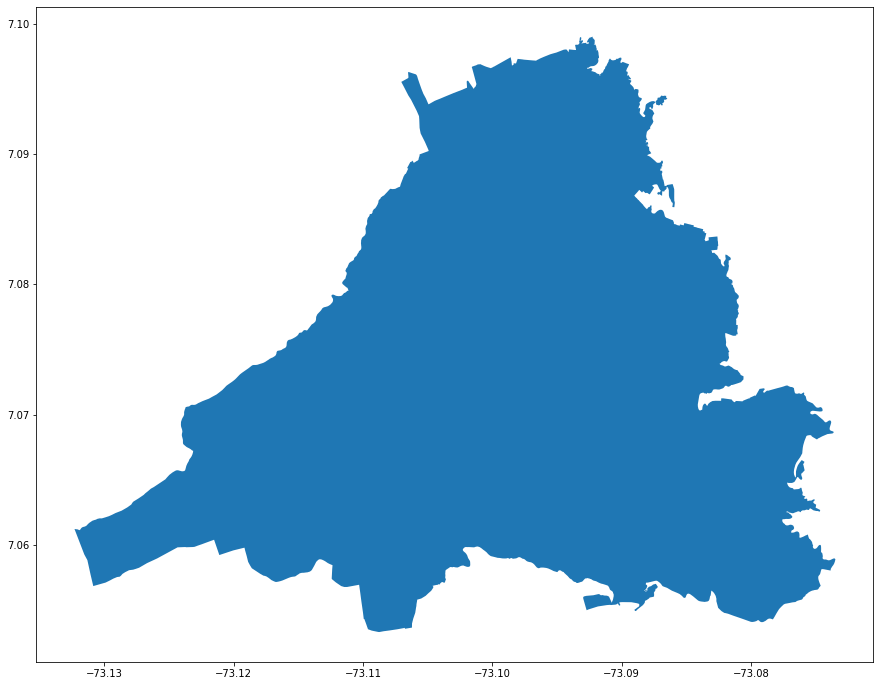

In [23]:
florida_map = gpd.read_file('68276_urbano.shp')
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
florida_map.plot(ax=ax)

In [24]:
florida_map_copy = florida_map.copy()
crs = pyproj.CRS(proj='utm', zone=18, ellps='WGS84')
florida_map_copy= florida_map_copy.to_crs(crs)

florida_map_copy["area_km"] = florida_map_copy['geometry'].area / 10**6
florida_map_copy["area_m"] = florida_map_copy['geometry'].area
Area_total = florida_map_copy['area_km'].sum()
print(Area_total)

17.03006698945965


In [25]:
points = random_points_in_polygon(1262, florida_map.iloc[0].geometry)

for i, point in enumerate(points):
    print("Point {}: ({},{})".format(str(i+1), point.x, point.y))

Point 1: (-73.09600598397235,7.079645045151483)
Point 2: (-73.10864198589519,7.073837521193555)
Point 3: (-73.1111555247979,7.079319187569536)
Point 4: (-73.09022168165724,7.056934240164663)
Point 5: (-73.10451911501836,7.059007700481062)
Point 6: (-73.11233712407662,7.078163757493134)
Point 7: (-73.0883274650028,7.068075485192147)
Point 8: (-73.10542337395385,7.086317994199269)
Point 9: (-73.08952058461792,7.084379919132714)
Point 10: (-73.08664227601007,7.056814037018222)
Point 11: (-73.08792635319506,7.073052647070607)
Point 12: (-73.11875897764791,7.066199528656081)
Point 13: (-73.10578570299549,7.055839920507566)
Point 14: (-73.09936975539412,7.082393648429278)
Point 15: (-73.10116369117648,7.065667783731652)
Point 16: (-73.07885167889842,7.068070461205125)
Point 17: (-73.08996768305704,7.077442036018146)
Point 18: (-73.09238065880963,7.074666849616802)
Point 19: (-73.12961344242136,7.058143202084717)
Point 20: (-73.10379276357537,7.078364240966314)
Point 21: (-73.08696379298935,7

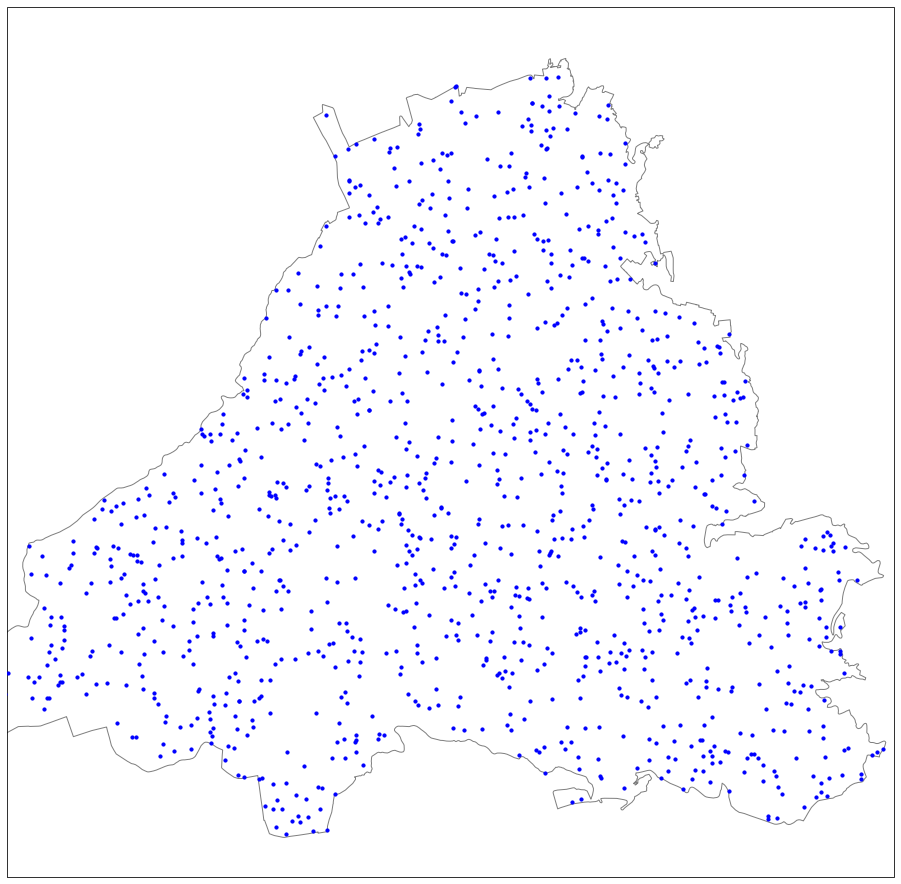

In [26]:
listaDeX = []
listaDeY = []
for point in points:
  listaDeX.append(point.x)
  listaDeY.append(point.y)

subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(listaDeX, listaDeY, zorder=10, c='b', s=10)

ax.add_line
plt.show()

In [27]:
lista_aux = []
for h in range(10, 210, 10):
  lista_K_ripley = []
  for i in range(0, 10, 1):
    k = valorK(listaDePuntos, h)
    #k = valorK(100, points, False) # K de ripley de los puntos randomicos del mapa
    lista_K_ripley.append(k)
  lista_aux.append(lista_K_ripley)
print(lista_K_ripley)
print(lista_aux)

[496110.7580373054, 241766.00532289446, 333768.9610173939, 634780.2203723816, 620064.6707858231, 121463.5484343802, 654599.6157872728, 82242.07393460888, 182369.91724587718, 352523.97808052716]
[[4518.563449318821, 1487.0834450621016, 4639.992774637323, 3273.2774567631877, 10227.840705512717, 8052.386660921298, 3347.9165649223964, 9865.295115860174, 815.8915060681591, 8163.579075430599], [10917.014810239481, 1744.56072906916, 12233.33772816531, 13039.370561496406, 20784.641038842263, 4453.96753395487, 13029.704643748039, 21698.094485136433, 8302.478217239344, 4364.178610261927], [28146.091842974154, 28747.00726408111, 7195.875335068182, 30393.37298858347, 14548.143723689553, 5932.362778306781, 15939.485439032738, 17811.505175358874, 1737.8167663112176, 22147.65565588033], [37596.980985180264, 47194.3382666329, 36347.6721669427, 25821.0190229911, 19811.712122759312, 36422.36019871098, 16890.496861218842, 50093.04562398912, 15121.03408271993, 17017.455705984627], [27492.590236115597, 362

In [28]:
tabla = []
cont = 0
h = 10
for i in range(0, 20, 1):
  list_final = []
  np_listaK = np.array(lista_aux[cont])
  np_listaK = np.sort(np_listaK)

  k_real = lista_aux[cont][0]
  np_perc1 = np.percentile(np_listaK, 2.5)
  np_perc2 = np.percentile(np_listaK, 97.5)

  list_final.append(h)
  list_final.append(k_real)
  list_final.append(np_perc1)
  list_final.append(np_perc2)
  cont+=1
  h += 10
  tabla.append(list_final)
tabla

[[10, 4518.563449318821, 966.9096923417961, 10146.267947840895],
 [20, 10917.014810239481, 2333.9747523375327, 21492.567459720245],
 [30, 28146.091842974154, 2681.5896190102194, 30022.940700570438],
 [40, 37596.980985180264, 15519.163207882186, 49440.83646858397],
 [50, 27492.590236115597, 5370.788832017327, 68883.19429941256],
 [60, 21515.452031768596, 10093.67722358199, 64510.57416772107],
 [70, 5150.585165682198, 8516.045526025715, 121157.79484522306],
 [80, 70177.24756190785, 41617.85823724615, 143317.8464766706],
 [90, 98394.71106390044, 14549.084142348827, 158488.86371071206],
 [100, 181251.338623117, 59982.05191286883, 191111.26962360257],
 [110, 186104.54458650135, 21762.660505342395, 229419.26935194872],
 [120, 22634.86374583904, 22789.561532180953, 241685.09964432873],
 [130, 103441.37885644552, 94202.39783018763, 302424.99139013636],
 [140, 76938.24767030653, 24778.20462888783, 342219.4148499151],
 [150, 325639.9487048515, 37466.72478224991, 394324.57320132956],
 [160, 40033

In [29]:
df_K_Ripley = pd.DataFrame(tabla, columns =['H', 'k_real', 'percentil_2.5', 'percentil_97.5'])
df_K_Ripley['H'] = df_K_Ripley.H.astype('category') 
print(df_K_Ripley)

      H         k_real  percentil_2.5  percentil_97.5
0    10    4518.563449     966.909692    10146.267948
1    20   10917.014810    2333.974752    21492.567460
2    30   28146.091843    2681.589619    30022.940701
3    40   37596.980985   15519.163208    49440.836469
4    50   27492.590236    5370.788832    68883.194299
5    60   21515.452032   10093.677224    64510.574168
6    70    5150.585166    8516.045526   121157.794845
7    80   70177.247562   41617.858237   143317.846477
8    90   98394.711064   14549.084142   158488.863711
9   100  181251.338623   59982.051913   191111.269624
10  110  186104.544587   21762.660505   229419.269352
11  120   22634.863746   22789.561532   241685.099644
12  130  103441.378856   94202.397830   302424.991390
13  140   76938.247670   24778.204629   342219.414850
14  150  325639.948705   37466.724782   394324.573201
15  160  400335.530840   17872.634529   435439.929001
16  170  279752.955447  129132.691209   386230.859001
17  180  428487.049321   215

In [30]:
df_K_Ripley.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   H               20 non-null     category
 1   k_real          20 non-null     float64 
 2   percentil_2.5   20 non-null     float64 
 3   percentil_97.5  20 non-null     float64 
dtypes: category(1), float64(3)
memory usage: 1.3 KB


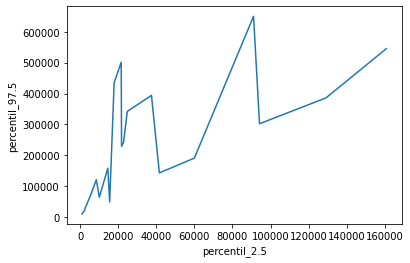

In [31]:
import seaborn as sb
sb.lineplot(x='percentil_2.5',y='percentil_97.5',data= df_K_Ripley)

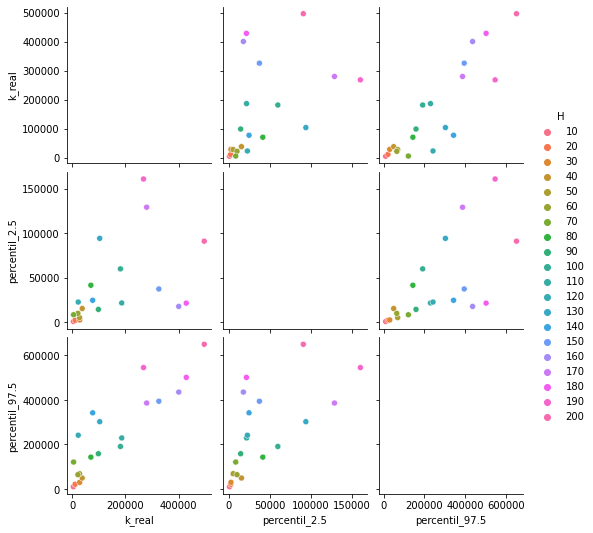

In [32]:
sb.pairplot(data=df_K_Ripley, hue='H')